In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split

In [88]:
hdi_dataSet=pd.read_csv("hdi.csv")

hdi_dataSet_2021 = hdi_dataSet[["Country"] + [col for col in hdi_dataSet.columns if "(2021)" in col]]


In [89]:
X=np.linspace(1990,2021,32)
# print(X)

hdi_dataSet_2021.drop(["HDI Rank (2021)"],axis=1,inplace=True)
# print(y)
hdi_dataSet_2021


C:\Users\asus\AppData\Local\Temp\ipykernel_11140\3992457639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_dataSet_2021.drop(["HDI Rank (2021)"],axis=1,inplace=True)


,Country,Human Development Index (2021),Life Expectancy at Birth (2021),Expected Years of Schooling (2021),Mean Years of Schooling (2021),Gross National Income Per Capita (2021),GDI Group (2021),Gender Development Index (2021),HDI female (2021),"Life Expectancy at Birth, female (2021)",...,Gender Inequality Index (2021),"Maternal Mortality Ratio (deaths per 100,000 live births) (2021)","Adolescent Birth Rate (births per 1,000 women ages 15-19) (2021)","Labour force participation rate, female (% ages 15 and older) (2021)","Labour force participation rate, male (% ages 15 and older) (2021)",Difference from HDI rank (2021),Planetary pressures-adjusted Human Development Index (2021),Difference from HDI value (%) (2021),Carbon dioxide emissions per capita (production) (tonnes) (2021),Material footprint per capita (tonnes) (2021)
0,Afghanistan,0.478,61.9824,10.263844,2.985070,1824.190915,5.0,0.681,0.364840,65.2791,...,0.678,638.0,82.565,14.848,66.515,5.0,0.474,0.836820,0.312376,1.38
1,Angola,0.586,61.6434,12.172100,5.417391,5465.617791,4.0,0.903,0.556745,64.3066,...,0.537,241.0,138.402,73.968,79.071,10.0,0.577,1.535836,0.675410,2.18
2,Albania,0.796,76.4626,14.448000,11.286455,14131.110390,1.0,1.007,0.799222,79.1726,...,0.144,15.0,14.517,50.733,66.154,28.0,0.739,7.160804,1.575754,12.96
3,Andorra,0.858,80.3684,13.300239,10.555120,51166.626610,NaN,NaN,NaN,84.3238,...,NaN,NaN,5.887,NaN,NaN,NaN,NaN,NaN,6.034945,NaN
4,United Arab Emirates,0.911,78.7104,15.717690,12.694030,62573.591810,2.0,0.953,0.877132,80.9371,...,0.049,3.0,3.085,46.542,88.003,-105.0,0.518,43.139407,15.193336,68.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,0.707,72.7675,12.418859,11.403800,5307.953374,2.0,0.957,0.685493,75.5034,...,0.418,43.0,43.589,30.700,54.237,NaN,NaN,NaN,1.238975,NaN
191,Yemen,0.455,63.7534,9.098710,3.200000,1314.270189,5.0,0.496,0.262570,67.1339,...,0.820,164.0,54.404,5.995,67.637,1.0,0.448,1.538462,0.327510,2.89
192,South Africa,0.713,62.3410,13.643710,11.373160,12948.373250,3.0,0.944,0.685864,64.9992,...,0.405,119.0,61.206,46.212,59.883,6.0,0.648,9.116410,7.620420,7.55
193,Zambia,0.565,61.2234,10.928760,7.187091,3217.767739,2.0,0.965,0.554427,63.9276,...,0.540,213.0,117.017,69.230,77.847,7.0,0.557,1.415929,0.357535,2.38


In [90]:
missing_coulmn_list=[]
for col in hdi_dataSet_2021.columns:
    missing_percentage = (hdi_dataSet_2021[col].isna().sum() / hdi_dataSet_2021.shape[0]) * 100
    if missing_percentage > 0:
        print(f"{col} missing percentage:\t{missing_percentage}%")
        missing_coulmn_list.append(col)
    else:
        hdi_dataSet_2021.dropna(subset=[col], inplace=True)


Human Development Index (2021) missing percentage:	2.051282051282051%
Expected Years of Schooling (2021) missing percentage:	1.0256410256410255%
Mean Years of Schooling (2021) missing percentage:	2.051282051282051%
Gross National Income Per Capita (2021) missing percentage:	1.0256410256410255%
GDI Group (2021) missing percentage:	11.794871794871794%
Gender Development Index (2021) missing percentage:	11.794871794871794%
HDI female (2021) missing percentage:	11.794871794871794%
Expected Years of Schooling, female (2021) missing percentage:	3.076923076923077%
Mean Years of Schooling, female (2021) missing percentage:	8.205128205128204%
Gross National Income Per Capita, female (2021) missing percentage:	8.205128205128204%
HDI male (2021) missing percentage:	11.794871794871794%
Expected Years of Schooling, male (2021) missing percentage:	3.076923076923077%
Mean Years of Schooling, male (2021) missing percentage:	8.205128205128204%
Gross National Income Per Capita, male (2021) missing perce

C:\Users\asus\AppData\Local\Temp\ipykernel_11140\2375423718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_dataSet_2021.dropna(subset=[col], inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_11140\2375423718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_dataSet_2021.dropna(subset=[col], inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_11140\2375423718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [91]:

for col in missing_coulmn_list:

    missing_value_percentage=(hdi_dataSet_2021.loc[:,col].isna().sum()/hdi_dataSet_2021.shape[0])*100

    if (missing_value_percentage)<0.5:
        hdi_dataSet_2021=hdi_dataSet_2021[hdi_dataSet_2021.loc[:,col].notna()]

    elif hdi_dataSet_2021.loc[:,col].dtype == np.float64 or hdi_dataSet_2021.loc[:,col].dtype == np.int64:
        median_col=hdi_dataSet_2021.loc[:,col].median()
        hdi_dataSet_2021.loc[:,col].fillna(median_col,inplace=True)
    else:    
        mode_col = hdi_dataSet_2021[col].mode()
        if not mode_col.empty:
            hdi_dataSet_2021[col] = hdi_dataSet_2021[col].fillna(mode_col[0])

C:\Users\asus\AppData\Local\Temp\ipykernel_11140\4239669314.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hdi_dataSet_2021.loc[:,col].fillna(median_col,inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_11140\4239669314.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_dataSet_2021.loc[:,col].fillna(median_col,inplace=True)

In [128]:
hdi_whole_coulmn_weight=hdi_dataSet_2021.select_dtypes(include=['float64', 'int64']).corr()
target_corr = hdi_whole_coulmn_weight['Human Development Index (2021)']
print(target_corr)

hdi_whole_coulmn_weight

Human Development Index (2021)                                          1.000000
Life Expectancy at Birth (2021)                                         0.884230
Expected Years of Schooling (2021)                                      0.891411
Mean Years of Schooling (2021)                                          0.909144
Gross National Income Per Capita (2021)                                 0.784684
GDI Group (2021)                                                       -0.647523
Gender Development Index (2021)                                         0.589362
HDI female (2021)                                                       0.955424
Life Expectancy at Birth, female (2021)                                 0.893454
Expected Years of Schooling, female (2021)                              0.896573
Mean Years of Schooling, female (2021)                                  0.882992
Gross National Income Per Capita, female (2021)                         0.786890
HDI male (2021)             

,Human Development Index (2021),Life Expectancy at Birth (2021),Expected Years of Schooling (2021),Mean Years of Schooling (2021),Gross National Income Per Capita (2021),GDI Group (2021),Gender Development Index (2021),HDI female (2021),"Life Expectancy at Birth, female (2021)","Expected Years of Schooling, female (2021)",...,Gender Inequality Index (2021),"Maternal Mortality Ratio (deaths per 100,000 live births) (2021)","Adolescent Birth Rate (births per 1,000 women ages 15-19) (2021)","Labour force participation rate, female (% ages 15 and older) (2021)","Labour force participation rate, male (% ages 15 and older) (2021)",Difference from HDI rank (2021),Planetary pressures-adjusted Human Development Index (2021),Difference from HDI value (%) (2021),Carbon dioxide emissions per capita (production) (tonnes) (2021),Material footprint per capita (tonnes) (2021)
Human Development Index (2021),1.000000,0.884230,0.891411,0.909144,0.784684,-0.647523,0.589362,0.955424,0.893454,0.896573,...,-0.874350,-0.752159,-0.808264,-0.068357,-0.149099,-0.258374,0.786200,0.658468,0.542661,0.641992
Life Expectancy at Birth (2021),0.884230,1.000000,0.761244,0.716818,0.722320,-0.517097,0.452261,0.840327,0.992460,0.769807,...,-0.801344,-0.766131,-0.817133,-0.079517,-0.042792,-0.222714,0.683819,0.569730,0.444962,0.570361
Expected Years of Schooling (2021),0.891411,0.761244,1.000000,0.774987,0.637694,-0.589209,0.530255,0.848429,0.769315,0.980815,...,-0.777796,-0.646767,-0.680439,0.012951,-0.137341,-0.189408,0.752847,0.557706,0.428883,0.564794
Mean Years of Schooling (2021),0.909144,0.716818,0.774987,1.000000,0.647982,-0.629225,0.587552,0.884747,0.738650,0.781314,...,-0.807411,-0.675354,-0.713775,-0.048480,-0.188403,-0.165522,0.766749,0.543837,0.472073,0.522241
Gross National Income Per Capita (2021),0.784684,0.722320,0.637694,0.647982,1.000000,-0.461928,0.375914,0.714341,0.703753,0.621973,...,-0.683717,-0.453123,-0.609395,0.089825,-0.000569,-0.514088,0.395377,0.717170,0.573992,0.708451
GDI Group (2021),-0.647523,-0.517097,-0.589209,-0.629225,-0.461928,1.000000,-0.830304,-0.741541,-0.564524,-0.635448,...,0.663917,0.567300,0.490125,-0.294412,0.045819,0.119711,-0.554403,-0.425480,-0.323675,-0.430371
Gender Development Index (2021),0.589362,0.452261,0.530255,0.587552,0.375914,-0.830304,1.000000,0.711860,0.490425,0.600374,...,-0.621952,-0.502093,-0.420972,0.366384,-0.037864,-0.085493,0.533175,0.370786,0.304080,0.353630
HDI female (2021),0.955424,0.840327,0.848429,0.884747,0.714341,-0.741541,0.711860,1.000000,0.852794,0.875320,...,-0.911519,-0.742815,-0.777599,0.019961,-0.144952,-0.256968,0.778383,0.661693,0.527143,0.647694
"Life Expectancy at Birth, female (2021)",0.893454,0.992460,0.769315,0.738650,0.703753,-0.564524,0.490425,0.852794,1.000000,0.779492,...,-0.809566,-0.799001,-0.826130,-0.088004,-0.056005,-0.188169,0.711234,0.554839,0.443716,0.552557
"Expected Years of Schooling, female (2021)",0.896573,0.769807,0.980815,0.781314,0.621973,-0.635448,0.600374,0.875320,0.779492,1.000000,...,-0.793917,-0.676462,-0.683098,0.008588,-0.140012,-0.211612,0.749062,0.583468,0.456350,0.582858


In [129]:
weight_coulmn=hdi_whole_coulmn_weight.iloc[0,:]
low_corr_features = target_corr[abs(target_corr) < 0.1].index
weight_coulmn_put = target_corr[abs(target_corr) > 0.1]

In [130]:
hdi_dataSet_2021
y=hdi_dataSet_2021["Human Development Index (2021)"]
X=hdi_dataSet_2021.drop(["Human Development Index (2021)","Country"]+list(low_corr_features),axis=1)
X

,Life Expectancy at Birth (2021),Expected Years of Schooling (2021),Mean Years of Schooling (2021),Gross National Income Per Capita (2021),GDI Group (2021),Gender Development Index (2021),HDI female (2021),"Life Expectancy at Birth, female (2021)","Expected Years of Schooling, female (2021)","Mean Years of Schooling, female (2021)",...,GII Rank (2021),Gender Inequality Index (2021),"Maternal Mortality Ratio (deaths per 100,000 live births) (2021)","Adolescent Birth Rate (births per 1,000 women ages 15-19) (2021)","Labour force participation rate, male (% ages 15 and older) (2021)",Difference from HDI rank (2021),Planetary pressures-adjusted Human Development Index (2021),Difference from HDI value (%) (2021),Carbon dioxide emissions per capita (production) (tonnes) (2021),Material footprint per capita (tonnes) (2021)
0,61.9824,10.263844,2.985070,1824.190915,5.0,0.681,0.364840,65.2791,7.736391,2.311080,...,167.0,0.678,638.0,82.565,66.5150,5.0,0.474,0.836820,0.312376,1.38
1,61.6434,12.172100,5.417391,5465.617791,4.0,0.903,0.556745,64.3066,11.540900,4.183876,...,136.0,0.537,241.0,138.402,79.0710,10.0,0.577,1.535836,0.675410,2.18
2,76.4626,14.448000,11.286455,14131.110390,1.0,1.007,0.799222,79.1726,15.314140,11.684433,...,39.0,0.144,15.0,14.517,66.1540,28.0,0.739,7.160804,1.575754,12.96
3,80.3684,13.300239,10.555120,51166.626610,2.0,0.967,0.715770,84.3238,13.910570,10.481139,...,85.5,0.363,53.0,5.887,69.3285,5.0,0.652,7.651007,6.034945,10.62
4,78.7104,15.717690,12.694030,62573.591810,2.0,0.953,0.877132,80.9371,16.535620,12.525340,...,11.0,0.049,3.0,3.085,88.0030,-105.0,0.518,43.139407,15.193336,68.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,72.7675,12.418859,11.403800,5307.953374,2.0,0.957,0.685493,75.5034,12.979506,11.774100,...,99.0,0.418,43.0,43.589,54.2370,5.0,0.652,7.651007,1.238975,10.62
191,63.7534,9.098710,3.200000,1314.270189,5.0,0.496,0.262570,67.1339,7.651040,2.880000,...,170.0,0.820,164.0,54.404,67.6370,1.0,0.448,1.538462,0.327510,2.89
192,62.3410,13.643710,11.373160,12948.373250,3.0,0.944,0.685864,64.9992,13.984400,9.657390,...,97.0,0.405,119.0,61.206,59.8830,6.0,0.648,9.116410,7.620420,7.55
193,61.2234,10.928760,7.187091,3217.767739,2.0,0.965,0.554427,63.9276,10.911169,7.179212,...,138.0,0.540,213.0,117.017,77.8470,7.0,0.557,1.415929,0.357535,2.38


In [131]:
weights = weight_coulmn_put[1:].values
print(weights)
X_weighted=X*weights

[ 0.88423017  0.89141129  0.90914436  0.78468397 -0.64752304  0.58936187
  0.95542362  0.89345357  0.89657288  0.88299158  0.7868897   0.960695
  0.86286201  0.85740503  0.86921754  0.80845697  0.92327641 -0.83612188
 -0.8288122  -0.88836595 -0.77974909 -0.40027308 -0.87787489 -0.87435022
 -0.75215902 -0.80826438 -0.1490991  -0.2583738   0.78619982  0.65846771
  0.54266121  0.6419921 ]


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
modelLr=LinearRegression()


In [134]:
modelLr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
y_predict=modelLr.predict(X_test)

In [137]:
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
mae = mean_absolute_error(y_test, y_predict)

print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.9836836161479429
RMSE: 0.020391251632314467
MAE: 0.01334154635670501


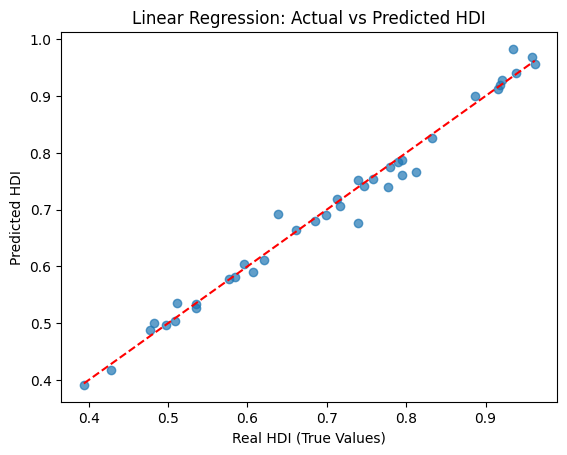

In [138]:
plt.scatter(y_test, y_predict, alpha=0.7)
plt.xlabel("Real HDI (True Values)")
plt.ylabel("Predicted HDI")
plt.title("Linear Regression: Actual vs Predicted HDI")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()